**Exercise Sheet 3: Multilayer Perceptrons and Backpropagation Algorithm**

**3.2: MLP Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
aData = np.genfromtxt('RegressionData.txt',delimiter = ' ')

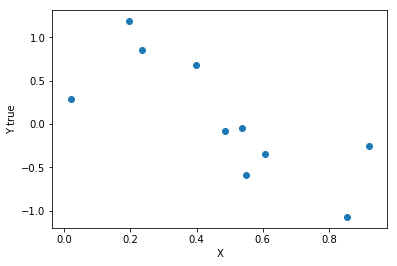

In [3]:
plt.figure()
plt.scatter(aData[:,0],aData[:,1])
plt.xlabel('X')
plt.ylabel('Y true')
plt.show()

In [4]:
'''
index wise try
'''
# configuration of the network
#   the matrix for weights
#   the matrix for sums (outputs)
L = [2,3,1] # layer construction
iLR = 0.01 # learning rate
P = len(aData[:,0]) # number of cases
iEpochMax = 3000 # maximum try
iEpoch = 0

def _iWr_():
    return np.random.random()-0.5

def _dtanh_(x):
    return x*(1-x)

W = [[[_iWr_(),_iWr_(),_iWr_()],[_iWr_(),_iWr_(),_iWr_()]],[[_iWr_()],[_iWr_()],[_iWr_()]]]
setError = []
while iEpoch < iEpochMax:
    G = [[[0,0,0],[0,0,0]],[[0],[0],[0]]] # gradients to set to zero
    iError = 0
    for i in range(P):
        ''' start of forward propagation'''
        H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
        S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
        D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
        H[0][0] = 1
        S[0][0] = 1
        H[0][1] = aData[i,0]
        S[0][1] = aData[i,0]
        for n in range(3):
            for p in range(2):
                H[1][n] += W[0][p][n] * H[0][p]
            S[1][n] = math.tanh(H[1][n])
        for p in range(3):
            H[2][0] += W[1][p][0] * S[1][p]
        S[2][0] = H[2][0]

        ''' start of back propagation'''
        D[2][0] = S[2][0] - aData[i,1]
        de = D[2][0]
        iError += np.abs(de)/P

        for n in range(3):
            for p in range(2):
                D[1][n] += W[0][p][n] * _dtanh_(H[0][p])
            D[1][n] = D[1][n]*D[2][0]*W[1][n][0]

        for l in range(2):
            for n in range(L[l]):
                for c in range(L[l+1]):
                    W[l][n][c] = W[l][n][c] - (iLR * S[l][n] * D[l+1][c])
    setError.append(iError)                
    iEpoch += 1

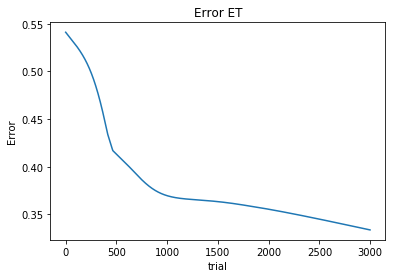

In [5]:
plt.figure()
plt.plot(setError)
plt.xlabel('trial')
plt.ylabel('Error')
plt.title('Error ET')
plt.show()

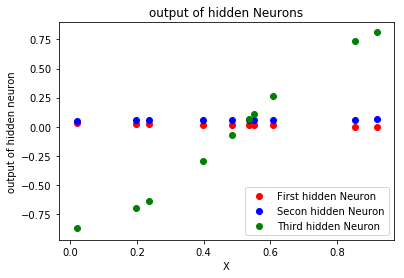

In [6]:
plt.figure()
for i in range(P):
    ''' start of forward propagation'''
    H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
    S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
    D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
    H[0][0] = 1
    S[0][0] = 1
    H[0][1] = aData[i,0]
    S[0][1] = aData[i,0]
    for n in range(3):
        for p in range(2):
            H[1][n] += W[0][p][n] * H[0][p]
        S[1][n] = math.tanh(H[1][n])
    plt.scatter(aData[i,0],S[1][0],color='r')
    plt.scatter(aData[i,0],S[1][1],color='b')
    plt.scatter(aData[i,0],S[1][2],color='g')
    for p in range(3):
        H[2][0] += W[1][p][0] * S[1][p]
    S[2][0] = H[2][0]
plt.legend(('First hidden Neuron','Secon hidden Neuron','Third hidden Neuron'),loc=4)
plt.xlabel('X')
plt.ylabel('output of hidden neuron')
plt.title('output of hidden Neurons')
plt.show()

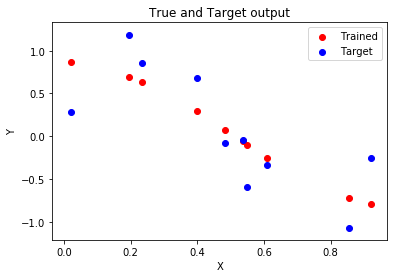

In [7]:
plt.figure()
for i in range(P):
    ''' start of forward propagation'''
    H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
    S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
    D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
    H[0][0] = 1
    S[0][0] = 1
    H[0][1] = aData[i,0]
    S[0][1] = aData[i,0]
    for n in range(3):
        for p in range(2):
            H[1][n] += W[0][p][n] * H[0][p]
        S[1][n] = math.tanh(H[1][n])
    for p in range(3):
        H[2][0] += W[1][p][0] * S[1][p]
    S[2][0] = H[2][0]
    plt.scatter(aData[i,0],S[2][0],color='r')
    plt.scatter(aData[i,0],aData[i,1],color='b')
plt.legend(('Trained','Target'))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True and Target output')
plt.show()

In [8]:
'''
index wise try
'''
# configuration of the network
#   the matrix for weights
#   the matrix for sums (outputs)
L = [2,3,1] # layer construction
iLR = 0.01 # learning rate
P = len(aData[:,0]) # number of cases
iEpochMax = 3000 # maximum try
iEpoch = 0

def _iWr_():
    return np.random.random()-0.5

def _dtanh_(x):
    return x*(1-x)

W1 = [[[_iWr_(),_iWr_(),_iWr_()],[_iWr_(),_iWr_(),_iWr_()]],[[_iWr_()],[_iWr_()],[_iWr_()]]]
setError1 = []
while iEpoch < iEpochMax:
    G = [[[0,0,0],[0,0,0]],[[0],[0],[0]]] # gradients to set to zero
    iError = 0
    for i in range(P):
        ''' start of forward propagation'''
        H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
        S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
        D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
        H[0][0] = 1
        S[0][0] = 1
        H[0][1] = aData[i,0]
        S[0][1] = aData[i,0]
        for n in range(3):
            for p in range(2):
                H[1][n] += W1[0][p][n] * H[0][p]
            S[1][n] = math.tanh(H[1][n])
        for p in range(3):
            H[2][0] += W1[1][p][0] * S[1][p]
        S[2][0] = H[2][0]

        ''' start of back propagation'''
        D[2][0] = S[2][0] - aData[i,1]
        de = D[2][0]
        iError += np.abs(de)/P

        for n in range(3):
            for p in range(2):
                D[1][n] += W1[0][p][n] * _dtanh_(H[0][p])
            D[1][n] = D[1][n]*D[2][0]*W1[1][n][0]

        for l in range(2):
            for n in range(L[l]):
                for c in range(L[l+1]):
                    W1[l][n][c] = W1[l][n][c] - (iLR * S[l][n] * D[l+1][c])
    setError1.append(iError)                
    iEpoch += 1

In [9]:
'''
index wise try
'''
# configuration of the network
#   the matrix for weights
#   the matrix for sums (outputs)
L = [2,3,1] # layer construction
iLR = 0.01 # learning rate
P = len(aData[:,0]) # number of cases
iEpochMax = 3000 # maximum try
iEpoch = 0

def _iWr_():
    return np.random.random()-0.5

def _dtanh_(x):
    return x*(1-x)

W2 = [[[_iWr_(),_iWr_(),_iWr_()],[_iWr_(),_iWr_(),_iWr_()]],[[_iWr_()],[_iWr_()],[_iWr_()]]]
setError2 = []
while iEpoch < iEpochMax:
    G = [[[0,0,0],[0,0,0]],[[0],[0],[0]]] # gradients to set to zero
    iError = 0
    for i in range(P):
        ''' start of forward propagation'''
        H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
        S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
        D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
        H[0][0] = 1
        S[0][0] = 1
        H[0][1] = aData[i,0]
        S[0][1] = aData[i,0]
        for n in range(3):
            for p in range(2):
                H[1][n] += W2[0][p][n] * H[0][p]
            S[1][n] = math.tanh(H[1][n])
        for p in range(3):
            H[2][0] += W2[1][p][0] * S[1][p]
        S[2][0] = H[2][0]

        ''' start of back propagation'''
        D[2][0] = S[2][0] - aData[i,1]
        de = D[2][0]
        iError += np.abs(de)/P

        for n in range(3):
            for p in range(2):
                D[1][n] += W2[0][p][n] * _dtanh_(H[0][p])
            D[1][n] = D[1][n]*D[2][0]*W2[1][n][0]

        for l in range(2):
            for n in range(L[l]):
                for c in range(L[l+1]):
                    W2[l][n][c] = W2[l][n][c] - (iLR * S[l][n] * D[l+1][c])
    setError2.append(iError)                
    iEpoch += 1

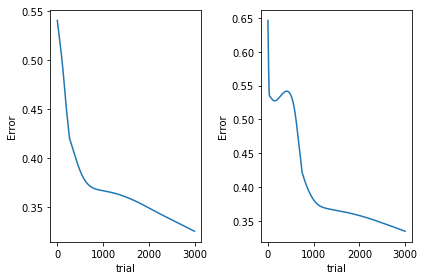

In [10]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(setError1)
plt.xlabel('trial')
plt.ylabel('Error')
plt.subplot(1,2,2)
plt.plot(setError2)
plt.xlabel('trial')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

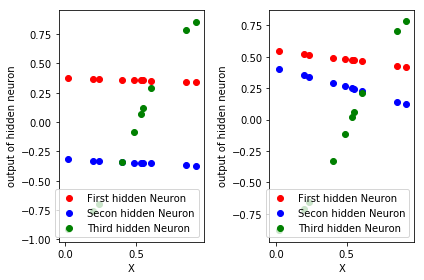

In [11]:
plt.figure()
plt.subplot(1,2,1)
for i in range(P):
    ''' start of forward propagation'''
    H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
    S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
    D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
    H[0][0] = 1
    S[0][0] = 1
    H[0][1] = aData[i,0]
    S[0][1] = aData[i,0]
    for n in range(3):
        for p in range(2):
            H[1][n] += W1[0][p][n] * H[0][p]
        S[1][n] = math.tanh(H[1][n])
    plt.scatter(aData[i,0],S[1][0],color='r')
    plt.scatter(aData[i,0],S[1][1],color='b')
    plt.scatter(aData[i,0],S[1][2],color='g')
    for p in range(3):
        H[2][0] += W1[1][p][0] * S[1][p]
    S[2][0] = H[2][0]
plt.legend(('First hidden Neuron','Secon hidden Neuron','Third hidden Neuron'),loc=4)
plt.xlabel('X')
plt.ylabel('output of hidden neuron')
plt.subplot(1,2,2)
for i in range(P):
    ''' start of forward propagation'''
    H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
    S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
    D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
    H[0][0] = 1
    S[0][0] = 1
    H[0][1] = aData[i,0]
    S[0][1] = aData[i,0]
    for n in range(3):
        for p in range(2):
            H[1][n] += W2[0][p][n] * H[0][p]
        S[1][n] = math.tanh(H[1][n])
    plt.scatter(aData[i,0],S[1][0],color='r')
    plt.scatter(aData[i,0],S[1][1],color='b')
    plt.scatter(aData[i,0],S[1][2],color='g')
    for p in range(3):
        H[2][0] += W2[1][p][0] * S[1][p]
    S[2][0] = H[2][0]
plt.legend(('First hidden Neuron','Secon hidden Neuron','Third hidden Neuron'),loc=4)
plt.xlabel('X')
plt.ylabel('output of hidden neuron')
plt.tight_layout()
plt.show()

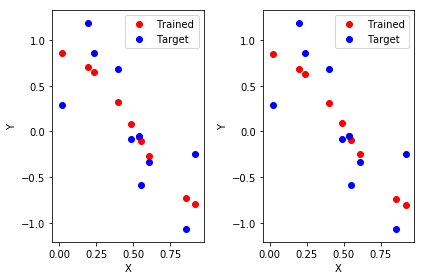

In [12]:
plt.figure()
plt.subplot(1,2,1)
for i in range(P):
    ''' start of forward propagation'''
    H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
    S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
    D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
    H[0][0] = 1
    S[0][0] = 1
    H[0][1] = aData[i,0]
    S[0][1] = aData[i,0]
    for n in range(3):
        for p in range(2):
            H[1][n] += W1[0][p][n] * H[0][p]
        S[1][n] = math.tanh(H[1][n])
    for p in range(3):
        H[2][0] += W1[1][p][0] * S[1][p]
    S[2][0] = H[2][0]
    plt.scatter(aData[i,0],S[2][0],color='r')
    plt.scatter(aData[i,0],aData[i,1],color='b')
plt.legend(('Trained','Target'))
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(1,2,2)
for i in range(P):
    ''' start of forward propagation'''
    H = [[0, 0], [0, 0, 0], [0]] # initiation of the sum
    S = [[0, 0], [0, 0, 0], [0]] # initiation of outputs
    D = [[0, 0], [0, 0, 0], [0]] # initiation of local errors
    H[0][0] = 1
    S[0][0] = 1
    H[0][1] = aData[i,0]
    S[0][1] = aData[i,0]
    for n in range(3):
        for p in range(2):
            H[1][n] += W2[0][p][n] * H[0][p]
        S[1][n] = math.tanh(H[1][n])
    for p in range(3):
        H[2][0] += W2[1][p][0] * S[1][p]
    S[2][0] = H[2][0]
    plt.scatter(aData[i,0],S[2][0],color='r')
    plt.scatter(aData[i,0],aData[i,1],color='b')
plt.legend(('Trained','Target'))
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

c) continue: as can be seen above, there is a difference between different trainings. One of the more visible differences, is the hidden neuron which gets focused on because of its initial weight. Also, the error correction rate is different, which can be important for convergence.
If the initial weights are closer to the nonlinear part of the tanh function, there is a better convergence as if they are near the linear area (close to zero).

d) apparently, a three layer network is unable to achive 100% regression (also can be assumed since the data is created with noise). Therefore the error cannot be reduced to zero. This means we may require the quadratic error function which reduces the importance of small errors near the local minimum. This also will help the convergence of the iterations. 